In [1]:
import intake
import pandas as pd
import xarray as xr
import numpy as np
import calendar
import geopandas as gp
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
from clisops.core.subset import subset_shape

## Find data

In [2]:
cmip6 = intake.open_esm_datastore('/g/data/dk92/catalog/v2/esm/cmip6-fs38/catalog.json')

In [3]:
hist_subset = cmip6.search(
    source_id=['ACCESS-CM2'],
    experiment_id=['historical'],
    variable_id='pr',
    table_id='Amon',
    file_type='l',
    time_range=['195001-201412', '185001-201412'],
)

In [4]:
hist_subset.df.sort_values(by=['member_id'])

,path,file_type,realm,frequency,table_id,project_id,institution_id,source_id,experiment_id,member_id,variable_id,grid_label,version,time_range
6,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r10i1p1f1,pr,gn,v20220819,195001-201412
4,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,pr,gn,v20191108,185001-201412
7,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r2i1p1f1,pr,gn,v20191125,185001-201412
1,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r3i1p1f1,pr,gn,v20200306,185001-201412
5,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r4i1p1f1,pr,gn,v20210607,185001-201412
8,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r5i1p1f1,pr,gn,v20210607,185001-201412
2,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r6i1p1f1,pr,gn,v20220819,195001-201412
3,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r7i1p1f1,pr,gn,v20220819,195001-201412
0,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r8i1p1f1,pr,gn,v20220819,195001-201412
9,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r9i1p1f1,pr,gn,v20220819,195001-201412


In [5]:
hist_subset.df.iloc[5]['path']

'/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r4i1p1f1/Amon/pr/gn/v20210607/pr_Amon_ACCESS-CM2_historical_r4i1p1f1_gn_185001-201412.nc'

In [6]:
ssp_subset = cmip6.search(
    source_id=['ACCESS-CM2'],
    experiment_id=['ssp370'],
    variable_id='pr',
    table_id='Amon',
    file_type='l',
)

In [7]:
ssp_subset.df.sort_values(by=['member_id'])

,path,file_type,realm,frequency,table_id,project_id,institution_id,source_id,experiment_id,member_id,variable_id,grid_label,version,time_range
6,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r10i1p1f1,pr,gn,v20231017,201501-210012
2,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r1i1p1f1,pr,gn,v20191108,201501-210012
8,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r2i1p1f1,pr,gn,v20200303,201501-210012
1,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r3i1p1f1,pr,gn,v20200428,201501-210012
4,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r4i1p1f1,pr,gn,v20210712,201501-210012
0,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r5i1p1f1,pr,gn,v20210802,201501-210012
7,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r6i1p1f1,pr,gn,v20230506,201501-210012
3,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r7i1p1f1,pr,gn,v20231017,201501-210012
5,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r8i1p1f1,pr,gn,v20231017,201501-210012
9,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r9i1p1f1,pr,gn,v20231017,201501-210012


In [8]:
ssp_subset.df.iloc[4]['path']

'/g/data/fs38/publications/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp370/r4i1p1f1/Amon/pr/gn/v20210712/pr_Amon_ACCESS-CM2_ssp370_r4i1p1f1_gn_201501-210012.nc'

## Create dataset

In [9]:
ds_hist_dict = hist_subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_type.project_id.institution_id.source_id.experiment_id.member_id.frequency.realm.table_id.variable_id.grid_label.version'


In [10]:
ds_hist_list = list(ds_hist_dict.values())
ds_hist_members = [ds.attrs['variant_label'] for ds in ds_hist_list]
ds_hist = xr.concat(
    ds_hist_list,
    pd.Index(ds_hist_members, name='member_id'),
)

In [11]:
ds_hist_clim = ds_hist.sel(time=slice('1985-01-01', '2014-12-31')).groupby('time.month').mean('time')

In [12]:
ds_hist_clim = ds_hist_clim.sortby('member_id')

In [13]:
ds_hist_clim

,Array,Chunk
Bytes,270.00 kiB,2.25 kiB
Shape,"(12, 10, 144, 2)","(1, 1, 144, 2)"
Count,290 Tasks,120 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,360.00 kiB,3.00 kiB
Shape,"(12, 10, 192, 2)","(1, 1, 192, 2)"
Count,290 Tasks,120 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [14]:
ds_ssp_dict = ssp_subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_type.project_id.institution_id.source_id.experiment_id.member_id.frequency.realm.table_id.variable_id.grid_label.version'


In [15]:
ds_ssp_list = list(ds_ssp_dict.values())
ds_ssp_members = [ds.attrs['variant_label'] for ds in ds_ssp_list]
ds_ssp = xr.concat(
    ds_ssp_list,
    pd.Index(ds_ssp_members, name='member_id'),
)

In [16]:
ds_ssp_clim = ds_ssp.sel(time=slice('2070-01-01', '2099-12-31')).groupby('time.month').mean('time')

In [17]:
ds_ssp_clim = ds_ssp_clim.sortby('member_id')

In [18]:
ds_ssp_clim

,Array,Chunk
Bytes,270.00 kiB,2.25 kiB
Shape,"(12, 10, 144, 2)","(1, 1, 144, 2)"
Count,290 Tasks,120 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,360.00 kiB,3.00 kiB
Shape,"(12, 10, 192, 2)","(1, 1, 192, 2)"
Count,290 Tasks,120 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [19]:
ds_change = ((ds_ssp_clim - ds_hist_clim) / ds_hist_clim) * 100

In [20]:
ds_change = ds_change.compute()

/g/data/xv83/quantile-mapping/miniconda3/envs/qq-workflows/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [21]:
ds_change

<xarray.Dataset>
Dimensions:    (lat: 144, lon: 192, member_id: 10, month: 12, bnds: 2)
Coordinates:
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * member_id  (member_id) object 'r10i1p1f1' 'r1i1p1f1' ... 'r9i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (month, member_id, lat, bnds) float64 -0.0 -0.0 -0.0 ... 0.0 0.0
    lon_bnds   (month, member_id, lon, bnds) float64 nan 0.0 0.0 ... 0.0 0.0 0.0
    pr         (month, member_id, lat, lon) float32 39.66 42.49 ... 213.5 214.6

## Plotting - individual runs

In [22]:
shape = gp.read_file('/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/australia/australia.shp')

In [23]:
increase = ds_change['pr'] > 0
count = increase.sum(dim='month')

/g/data/xv83/quantile-mapping/miniconda3/envs/qq-workflows/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/quantile-mapping/miniconda3/envs/qq-workflows/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")


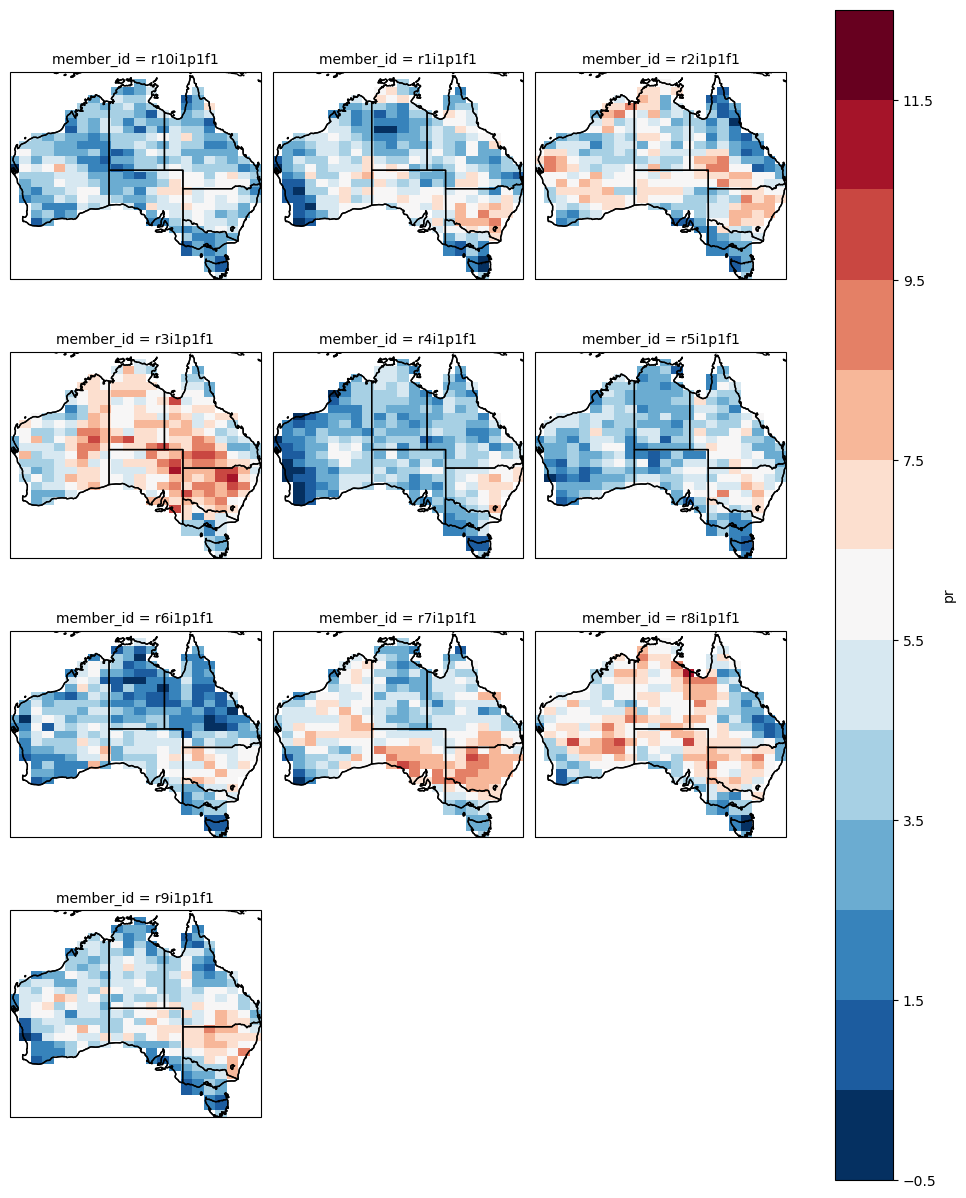

In [24]:
count = subset_shape(count, shape=shape)
p = count.plot(
    col='member_id',
    transform=ccrs.PlateCarree(),
#    figsize=[20, 20],
    col_wrap=3,
    subplot_kws={'projection': ccrs.PlateCarree(),},
    levels=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5],
)
#plt.colorbar(
#    p,
#    ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#    label='number of months',
#) 
xmin = 112.92
xmax = 153.63
ymin = -43.625
ymax = -10.07
for ax in p.axes.flat:
    ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)

plt.title('Number of months where the climatological mean increases')
plt.show()

In [25]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Mildura': (-34.2, 142.1),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Karlamilyi National Park': (-22.7, 122.2),
    'Perth': (-32.0, 115.9),
    'Adelaide': (-34.9, 138.6),
}

In [26]:
xticks = np.arange(1, 13)
xtick_labels = [calendar.month_abbr[i] for i in xticks]

In [51]:
def plot_runs_city(city, ylim=None):
    """Plot all the runs for a city location"""

    lat, lon = city_lat_lon[city]
    point_selection = {'lat': lat, 'lon': lon}
    da_change_point = ds_change['pr'].sel(point_selection, method='nearest').compute()

    fig, axs = plt.subplots(5, 2, figsize=(15, 30))
    axs = axs.flatten()
    for num, ax in enumerate(axs):
        da_change_point_member = da_change_point.isel({'member_id': num})
        member_id = str(da_change_point_member['member_id'].values)
        ax.bar(xticks, da_change_point_member)
        ax.set_title(member_id)
        ax.set_ylabel('Change (%)')
        ax.set_xticks(xticks, xtick_labels)
        if ylim:
            ax.set_ylim(ylim[0], ylim[-1])
        ax.grid()
    plt.suptitle(city)
    plt.show()

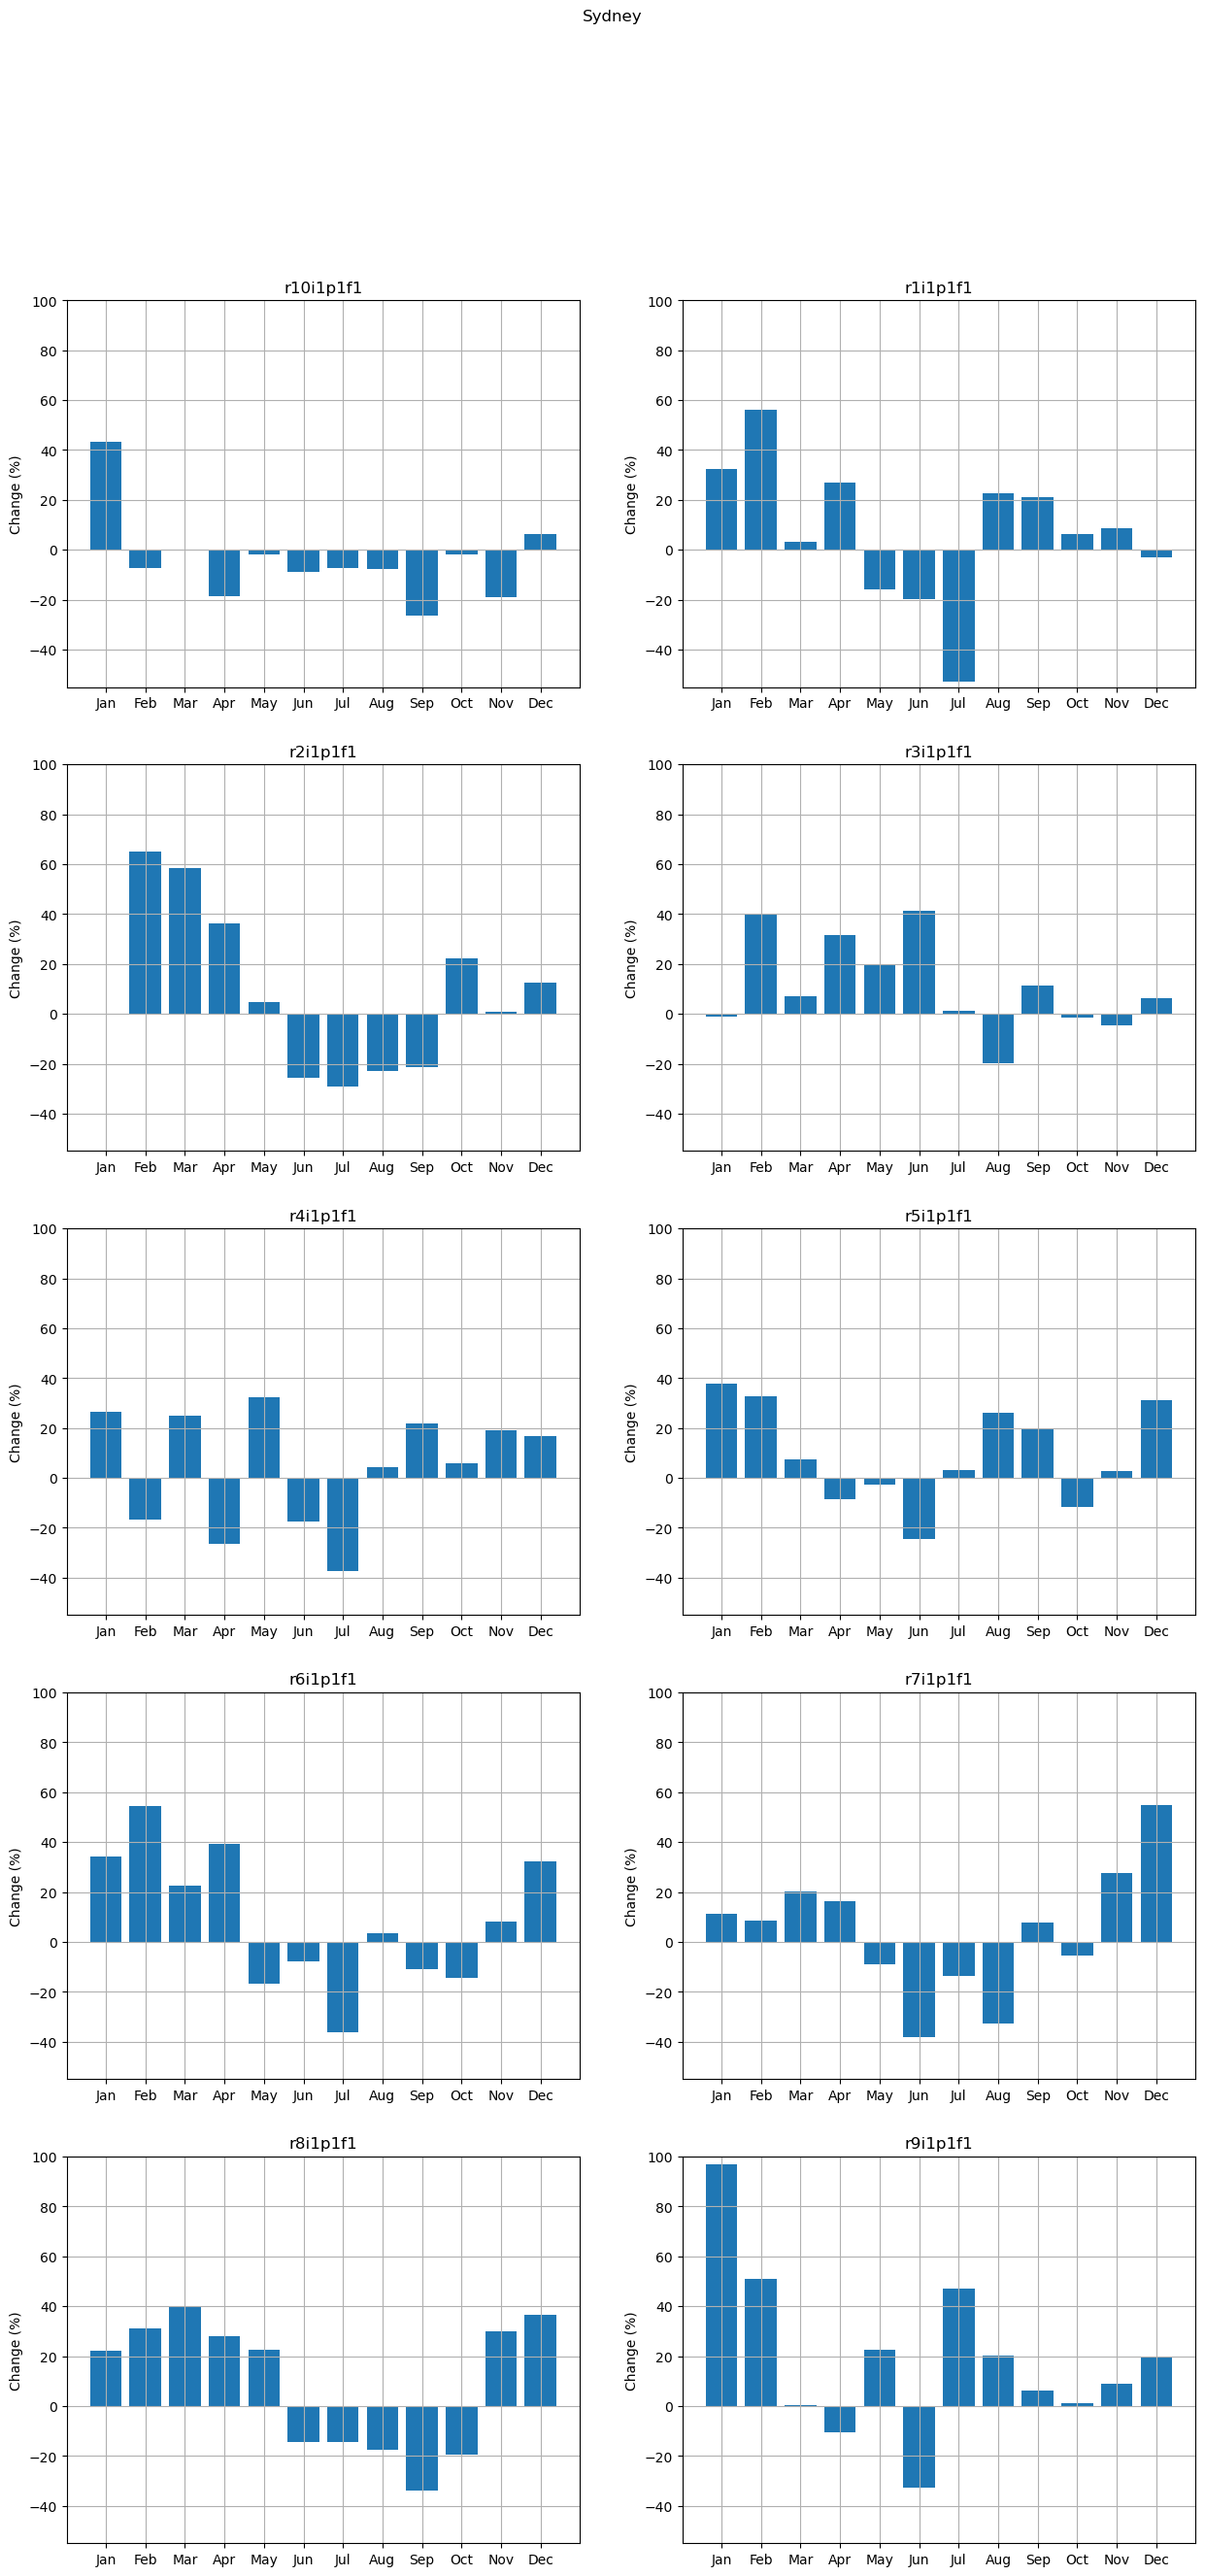

In [52]:
plot_runs_city('Sydney', ylim=[-55, 100])

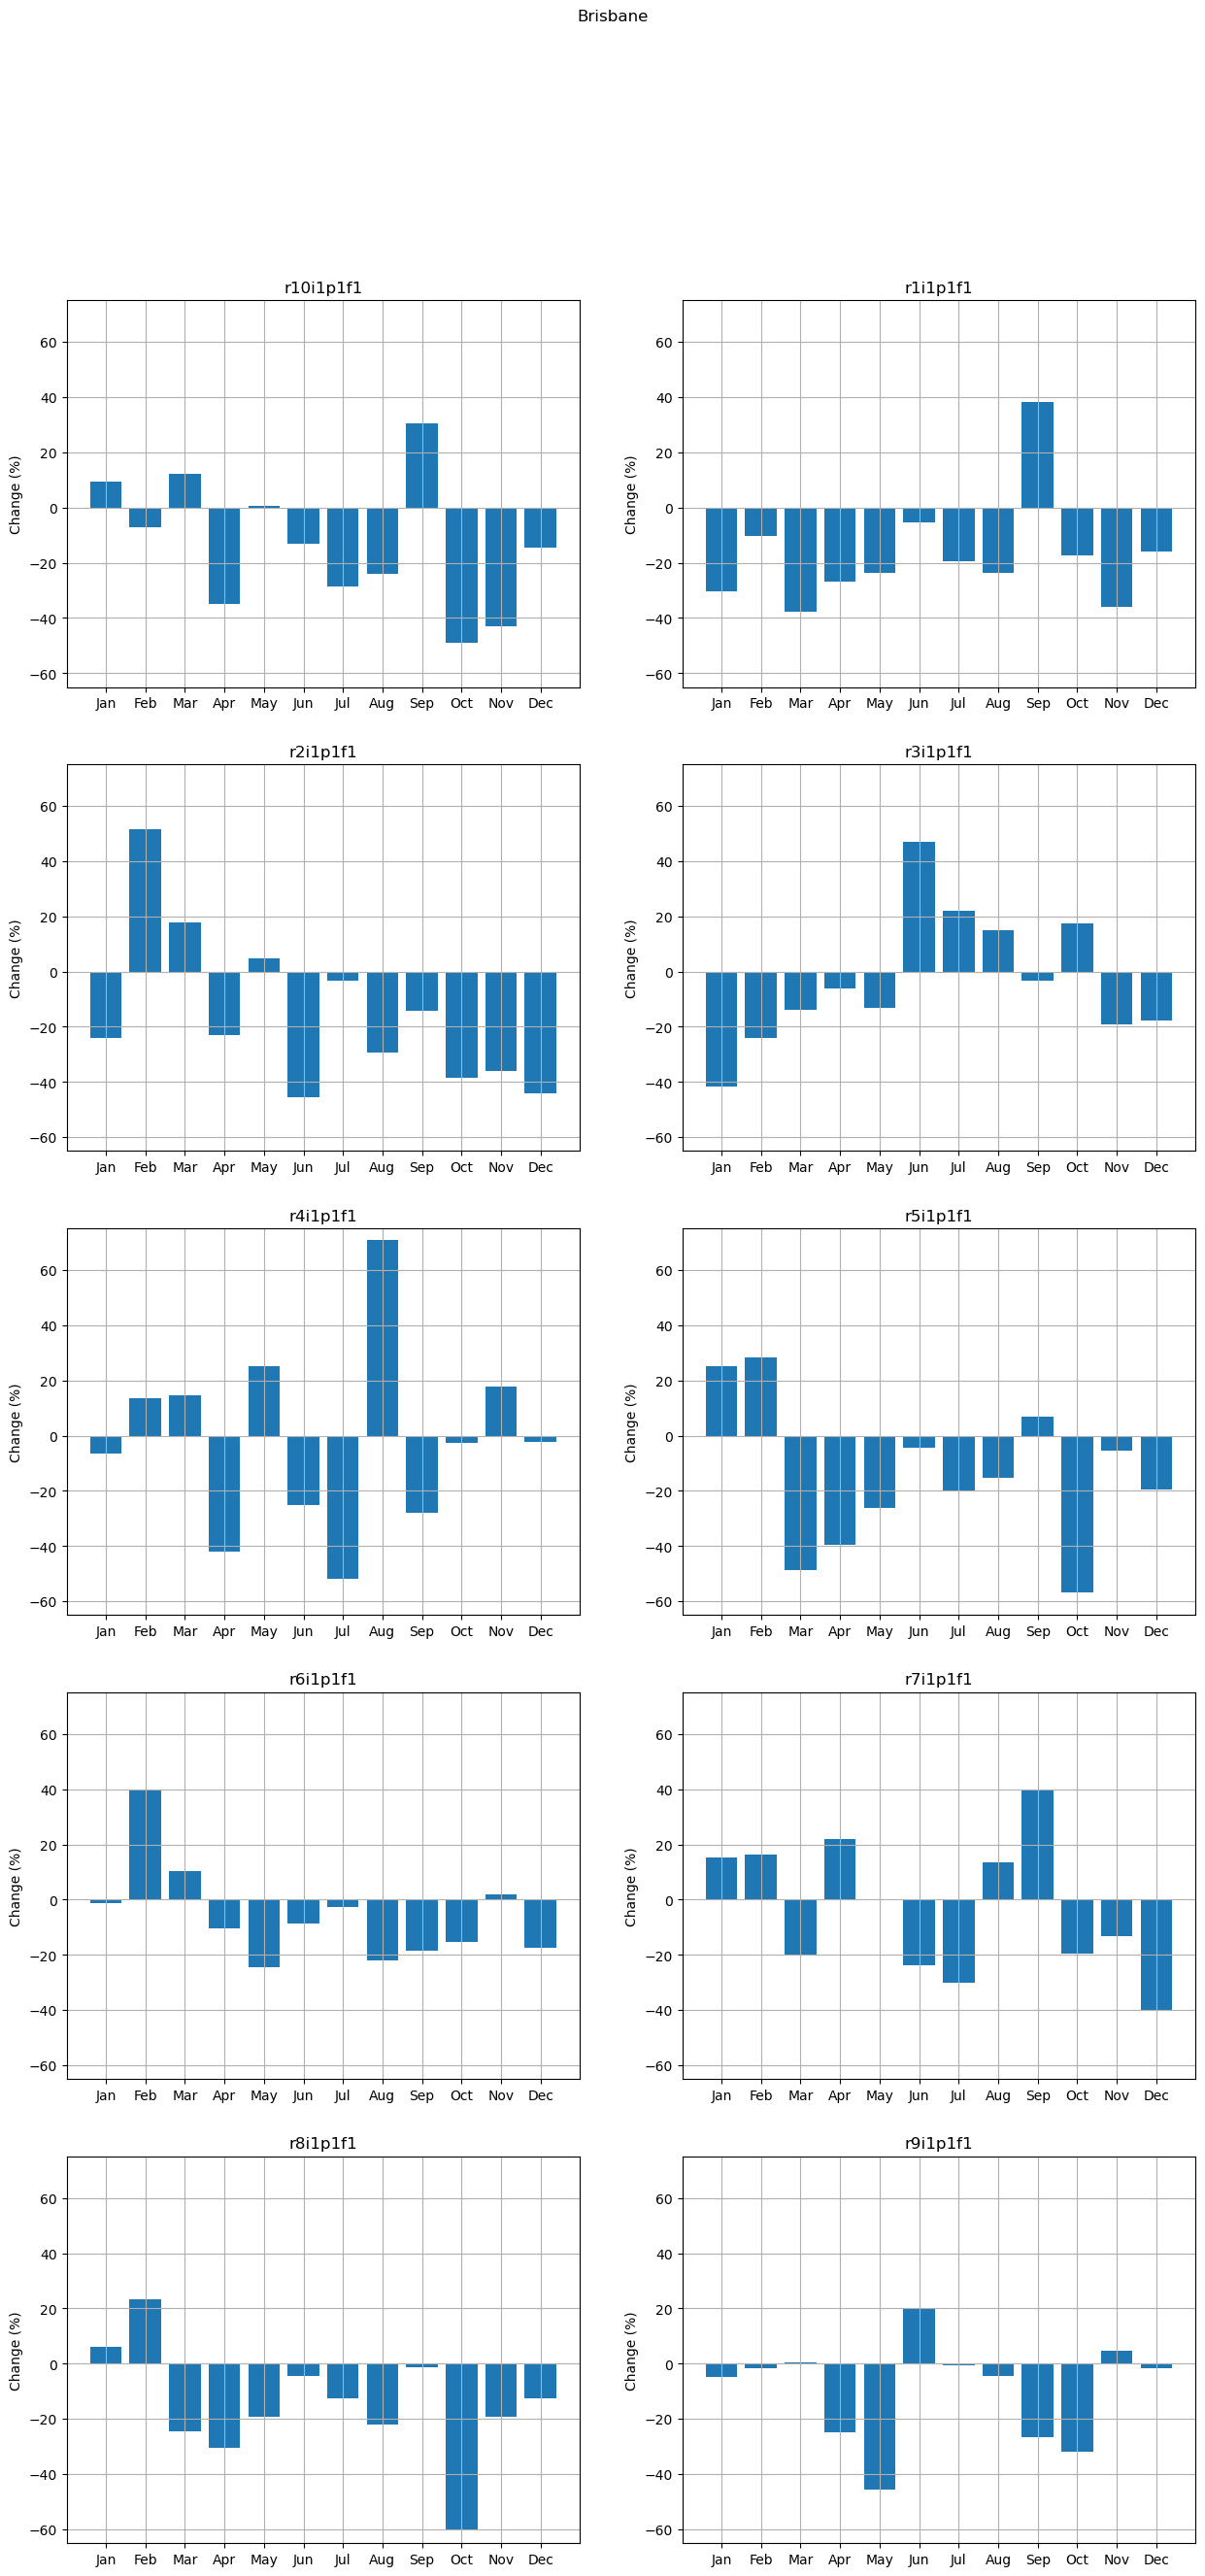

In [55]:
plot_runs_city('Brisbane', ylim=[-65, 75])

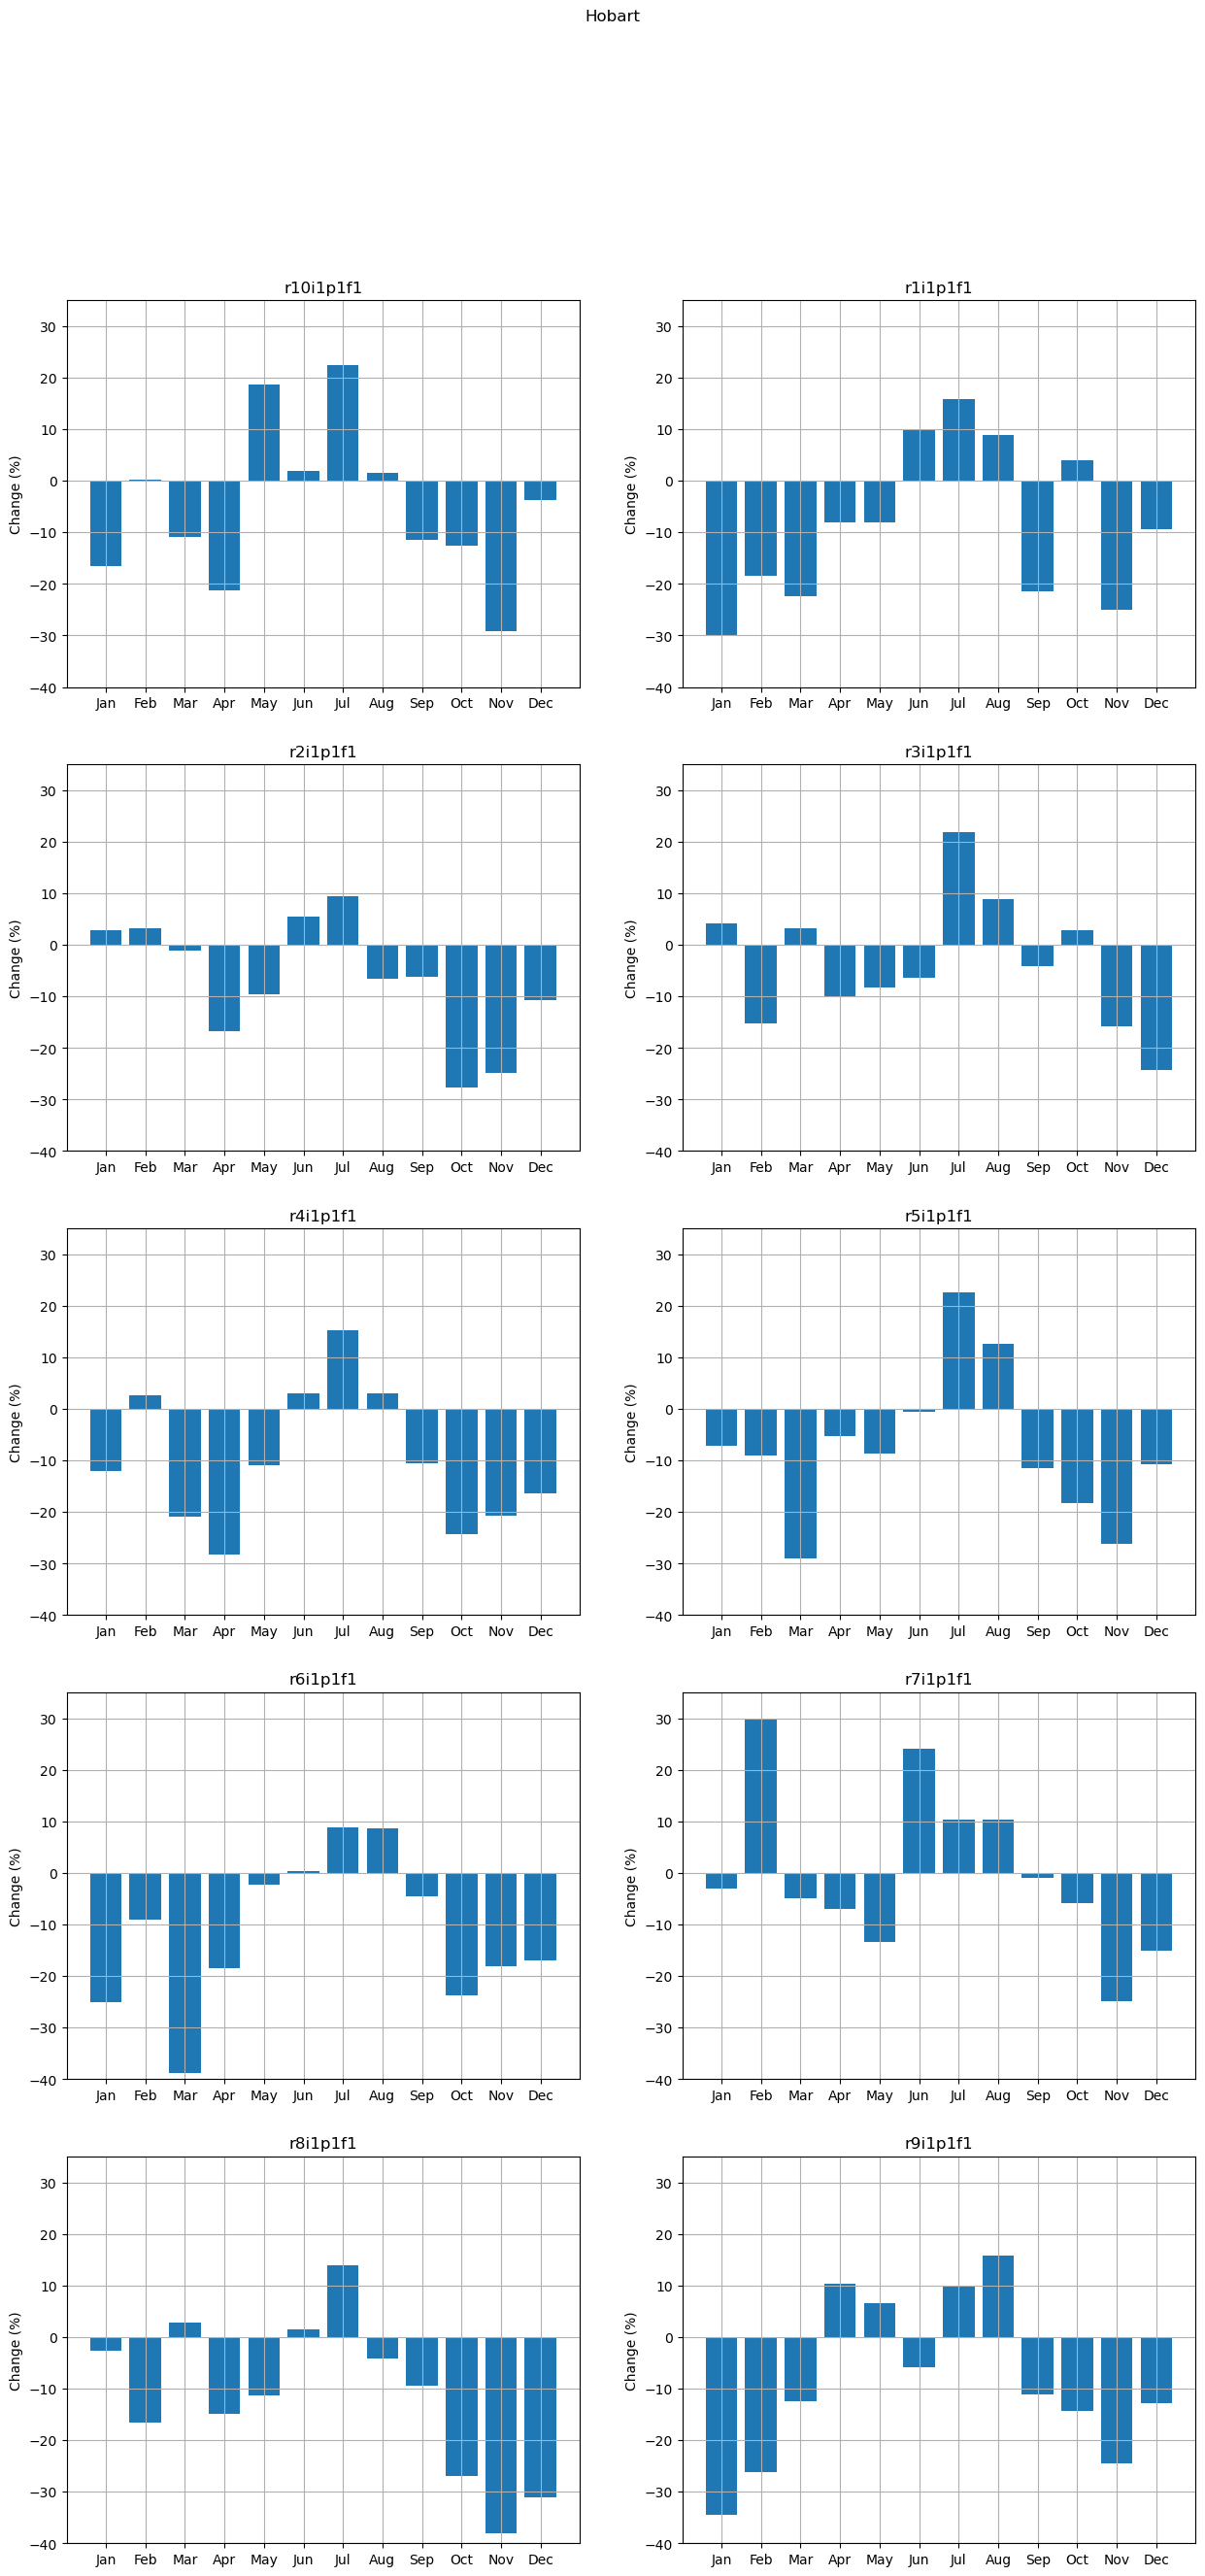

In [57]:
plot_runs_city('Hobart', ylim=[-40, 35])

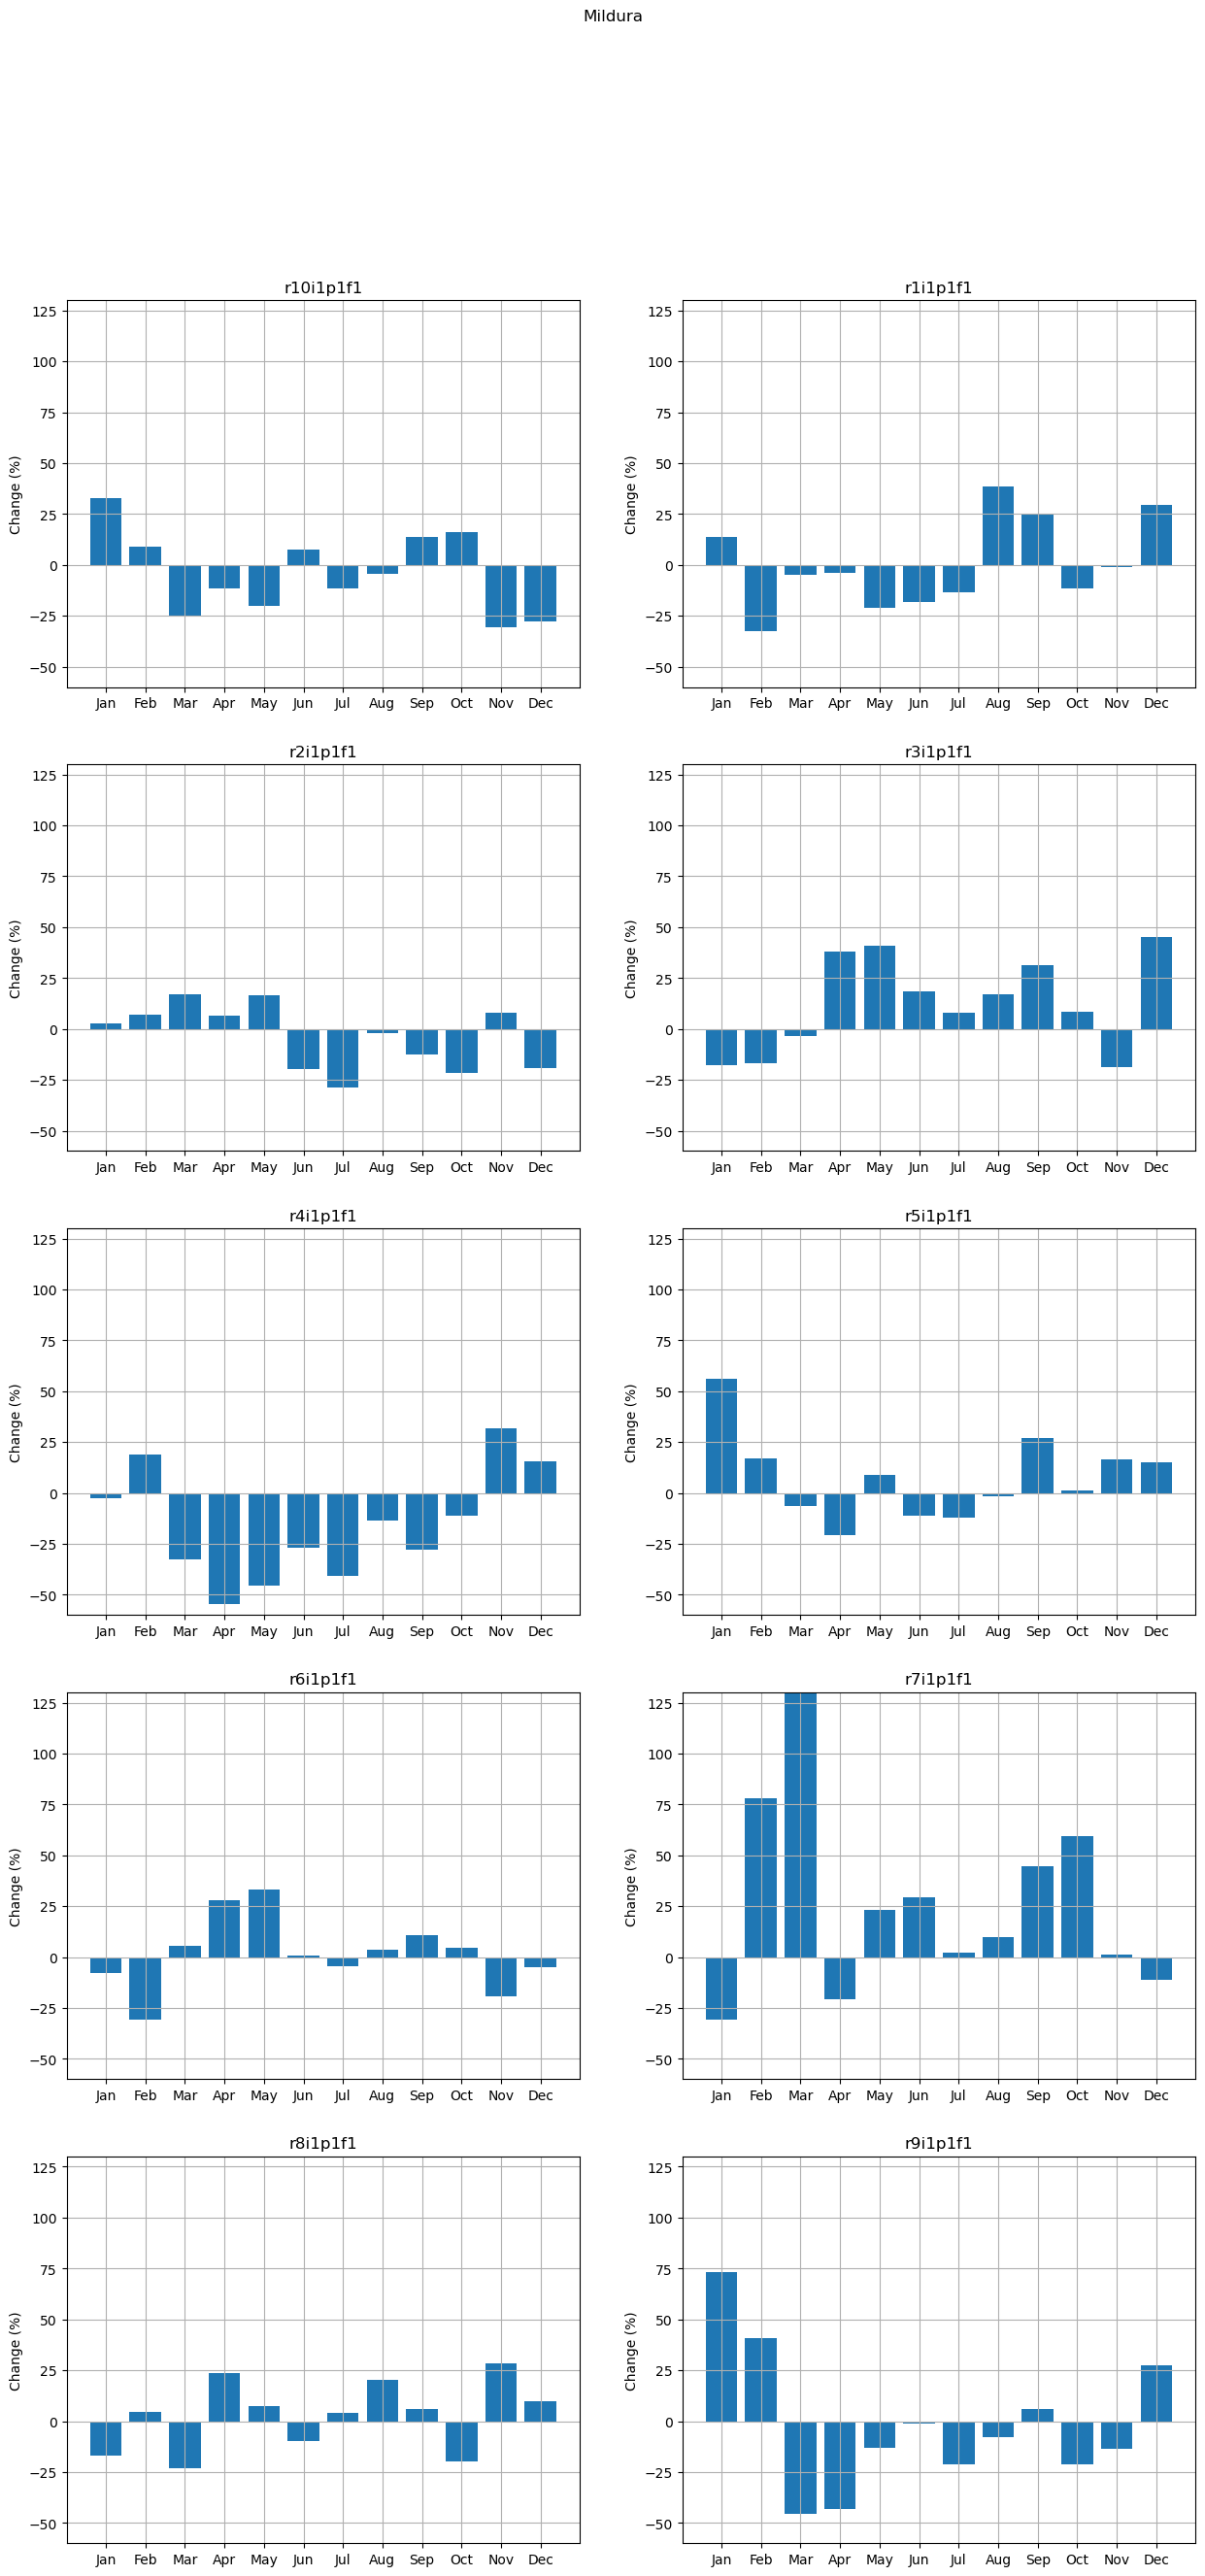

In [60]:
plot_runs_city('Mildura', ylim=[-60, 130])

## Plotting - ensemble mean

In [30]:
ds_hist_clim_ensmean = ds_hist_clim.mean(dim='member_id')

In [31]:
ds_ssp_clim_ensmean = ds_ssp_clim.mean(dim='member_id')

In [32]:
ds_change_ensmean = ((ds_ssp_clim_ensmean - ds_hist_clim_ensmean) / ds_hist_clim_ensmean) * 100

In [33]:
ds_change_ensmean = ds_change_ensmean.compute()

/g/data/xv83/quantile-mapping/miniconda3/envs/qq-workflows/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [34]:
increase_ensmean = ds_change_ensmean['pr'] > 0
count_ensmean = increase_ensmean.sum(dim='month')

In [35]:
count_ensmean = subset_shape(count_ensmean, shape=shape)

/g/data/xv83/quantile-mapping/miniconda3/envs/qq-workflows/lib/python3.10/site-packages/clisops/core/subset.py:167: UserWarning: CRS definitions are similar but raster lon values must be wrapped.
  final = func(*formatted_args, **kwargs)
/g/data/xv83/quantile-mapping/miniconda3/envs/qq-workflows/lib/python3.10/site-packages/clisops/core/subset.py:350: UserWarning: Wrapping longitudes at 180 degrees.
  warnings.warn("Wrapping longitudes at 180 degrees.")


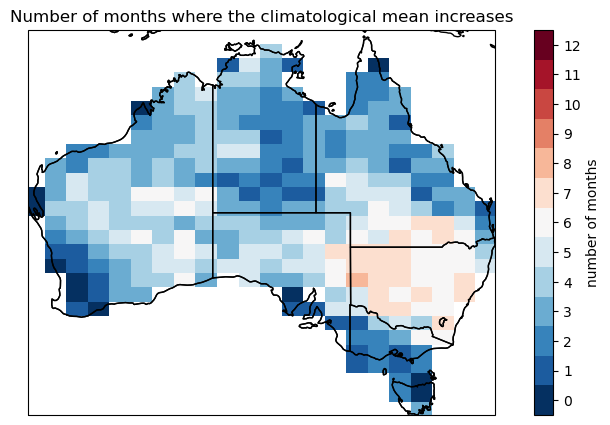

In [36]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

cax = count_ensmean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5],
    add_colorbar=False,
)
    
fig.colorbar(
    cax,
    ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    label='number of months',
)

xmin = 112.92
xmax = 153.63
ymin = -43.625
ymax = -10.07
ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.set_title('Number of months where the climatological mean increases')
plt.show()

In [37]:
def plot_ensemble_city(city):
    """Ensemble plot for a city"""
    
    lat, lon = city_lat_lon[city]
    point_selection = {'lat': lat, 'lon': lon}
    da_change_ensmean_point = ds_change_ensmean['pr'].sel(point_selection, method='nearest').compute()
    da_change_point = ds_change['pr'].sel(point_selection, method='nearest').compute()
    
    fig = plt.figure(figsize=(8, 5))
    ax = plt.subplot(111)

    ax.bar(xticks, da_change_ensmean_point, label='ensemble mean', alpha=0.5)
    ax.set_ylabel('Change (%)')
    ax.set_xticks(xticks, xtick_labels)

    for member in range(10):
        da_change_point_member = da_change_point.isel({'member_id': member})
        member_id = str(da_change_point_member['member_id'].values)
        ax.scatter(xticks, da_change_point_member, label=member_id)

    ax.grid()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(city)
    
    plt.show()

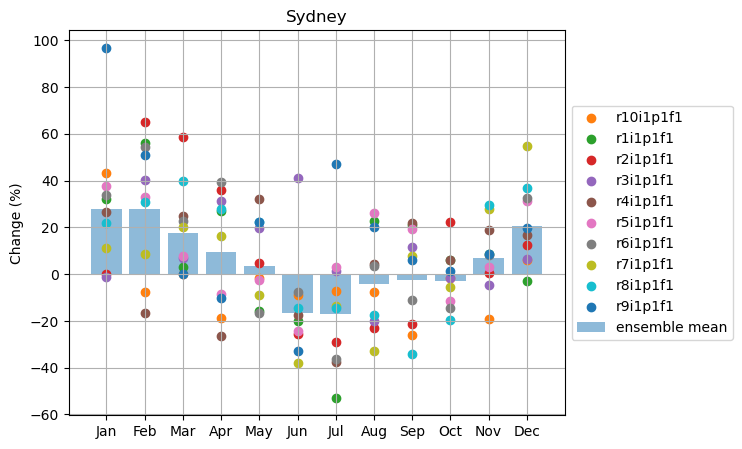

In [38]:
plot_ensemble_city("Sydney")

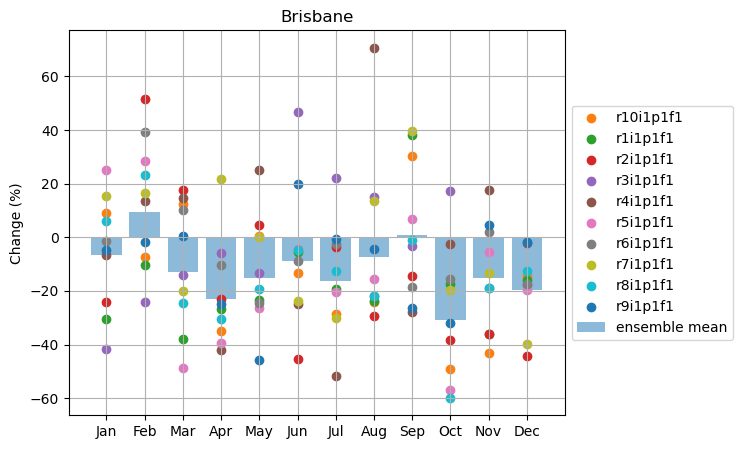

In [39]:
plot_ensemble_city("Brisbane")

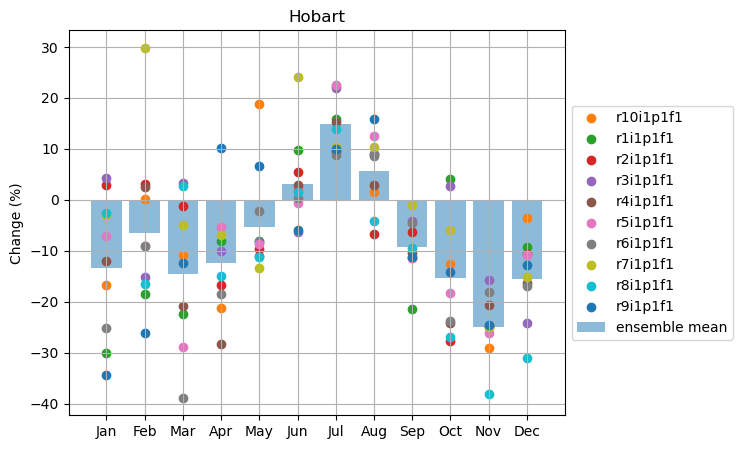

In [56]:
plot_ensemble_city("Hobart")

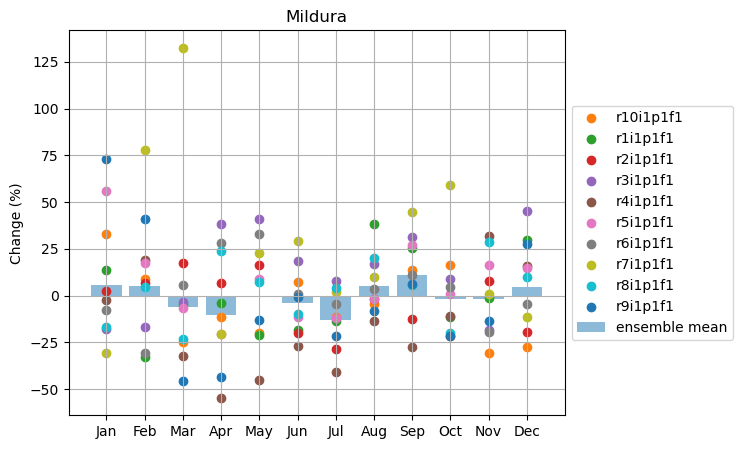

In [58]:
plot_ensemble_city("Mildura")

## Annual change

In [40]:
ds_hist_annual_mean = ds_hist.sel(time=slice('1985-01-01', '2014-12-31')).mean('time')

In [41]:
ds_ssp_annual_mean = ds_ssp.sel(time=slice('2070-01-01', '2099-12-31')).mean('time')

In [42]:
ds_change_annual = ((ds_ssp_annual_mean - ds_hist_annual_mean) / ds_hist_annual_mean) * 100

In [44]:
ds_change_annual.member_id.values

array(['r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r8i1p1f1', 'r5i1p1f1',
       'r6i1p1f1', 'r9i1p1f1', 'r7i1p1f1', 'r1i1p1f1', 'r10i1p1f1'],
      dtype=object)

In [46]:
def print_annual_change(city):
    """Print annual change for a city"""

    lat, lon = city_lat_lon[city]
    point_selection = {'lat': lat, 'lon': lon}
    da_change_annual_point = ds_change_annual['pr'].sel(point_selection, method='nearest').compute()
    print(da_change_annual_point.values)

In [48]:
print_annual_change('Sydney')

[ 9.714978  12.015226   2.7931113 11.913444   9.103984  10.045467
 16.85121    5.1527143  5.510905  -3.111125 ]


In [49]:
print_annual_change('Brisbane')

[-16.89453   -10.646918   -4.614385  -13.325116  -15.889338   -4.379336
  -9.0182905  -6.325005  -20.580158  -13.885493 ]


In [61]:
print_annual_change('Hobart')

[ -6.8039856   -3.299347    -9.291272   -10.879365    -6.7802086
 -10.234221    -6.9029274    0.24870765  -7.3055253   -4.6245894 ]


In [62]:
print_annual_change('Mildura')

[ -4.246498    9.254601  -18.541828    1.8473629   6.524531   -1.1241523
  -3.9796364  19.214315   -2.3121943  -5.0794578]
